(i) Business Understanding
my aim to estimate laptop prices based on their specifications (e.g., CPU, RAM, GPU, display size). This is a regression problem, where the target variable is price.

Goal: Predict the price of laptops based on technical specifications.
Why: This helps users or sellers estimate a fair market price based on features like RAM, CPU, display, etc.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

# Load dataset
df = pd.read_csv("/content/dataset.laptop.csv")

Understand RAM and ROM Units
onvert RAM/ROM from "GB"/"TB" strings to numeric values for analysis.

In [2]:
def convert_storage(val):
    val = str(val).upper().strip()
    if 'TB' in val:
        return int(float(val.replace('TB', '')) * 1000)
    elif 'GB' in val:
        return int(val.replace('GB', ''))
    else:
        return np.nan

df['Ram'] = df['Ram'].apply(convert_storage)
df['ROM'] = df['ROM'].apply(convert_storage)


Drop Irrelevant Columns
I drop name and CPU because they’re high-cardinality or redundant.

In [3]:
df.drop(columns=['name', 'CPU'], inplace=True)


Encode Categorical Features
Label encoding turns categorical text into numeric codes for modeling.

In [4]:
cat_cols = ['brand', 'processor', 'Ram_type', 'ROM_type', 'GPU', 'OS']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


 Drop Missing Values
Any errors or unknown values in previous steps are removed.

In [5]:
df.dropna(inplace=True)


In [6]:
# Show basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              893 non-null    int64  
 1   spec_rating        893 non-null    float64
 2   processor          893 non-null    int64  
 3   Ram                893 non-null    int64  
 4   Ram_type           893 non-null    int64  
 5   ROM                893 non-null    int64  
 6   ROM_type           893 non-null    int64  
 7   GPU                893 non-null    int64  
 8   display_size       893 non-null    float64
 9   resolution_width   893 non-null    int64  
 10  resolution_height  893 non-null    int64  
 11  OS                 893 non-null    int64  
 12  warranty           893 non-null    int64  
 13  price              893 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 97.8 KB
None
            brand  spec_rating   processor         Ram    Ram_type  \


In [14]:
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Assuming you intended to check the type of the training features
# This line should be run AFTER the cell where X_train is defined.
type(X_train)

pandas.core.frame.DataFrame

In [18]:
X_train.isnull().sum()

,0
brand,0
spec_rating,0
processor,0
Ram,0
Ram_type,0
ROM,0
ROM_type,0
GPU,0
display_size,0
resolution_width,0


In [20]:
#Show me the locations where the null values are
X_train[X_train.isnull().any(axis=1)]

,brand,spec_rating,processor,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty


In [21]:
X_train = X_train.dropna() # Dropping those records having null values

In [22]:
X_train.isnull().sum()

,0
brand,0
spec_rating,0
processor,0
Ram,0
Ram_type,0
ROM,0
ROM_type,0
GPU,0
display_size,0
resolution_width,0


In [24]:
X_train. shape # printing the shape -- Yes, 15 rows containing null values are removed

(714, 13)

In [25]:
X_train.dtypes  # checking the data type of every column

,0
brand,int64
spec_rating,float64
processor,int64
Ram,int64
Ram_type,int64
ROM,int64
ROM_type,int64
GPU,int64
display_size,float64
resolution_width,int64


Exploratory Data Analysis (EDA)
Heatmap of Correlations

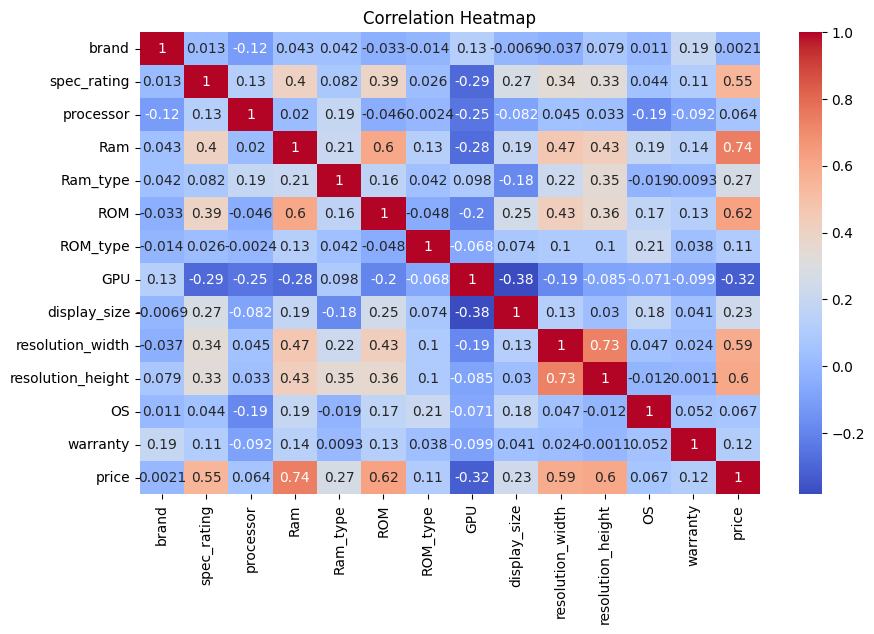

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs


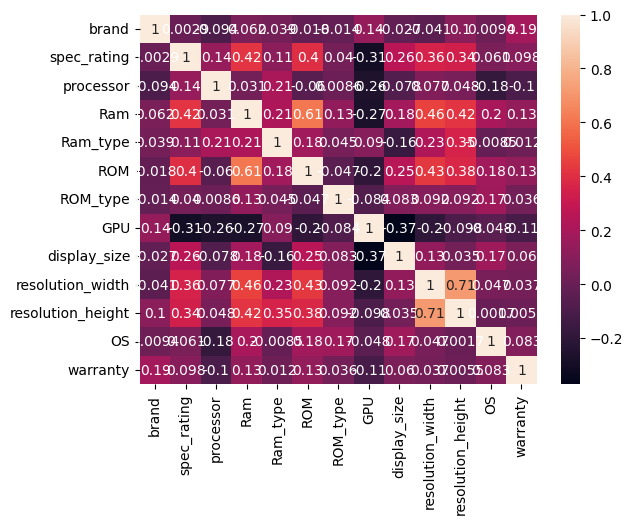

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


# Compute correlation matrix for numerical columns
%time
corr = X_train.select_dtypes(include=['number']).corr()

# Plot heatmap
sns.heatmap(corr, annot=True, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()



Boxplot of Price by Brand

In [29]:
df = pd.read_csv("/content/dataset.laptop.csv")

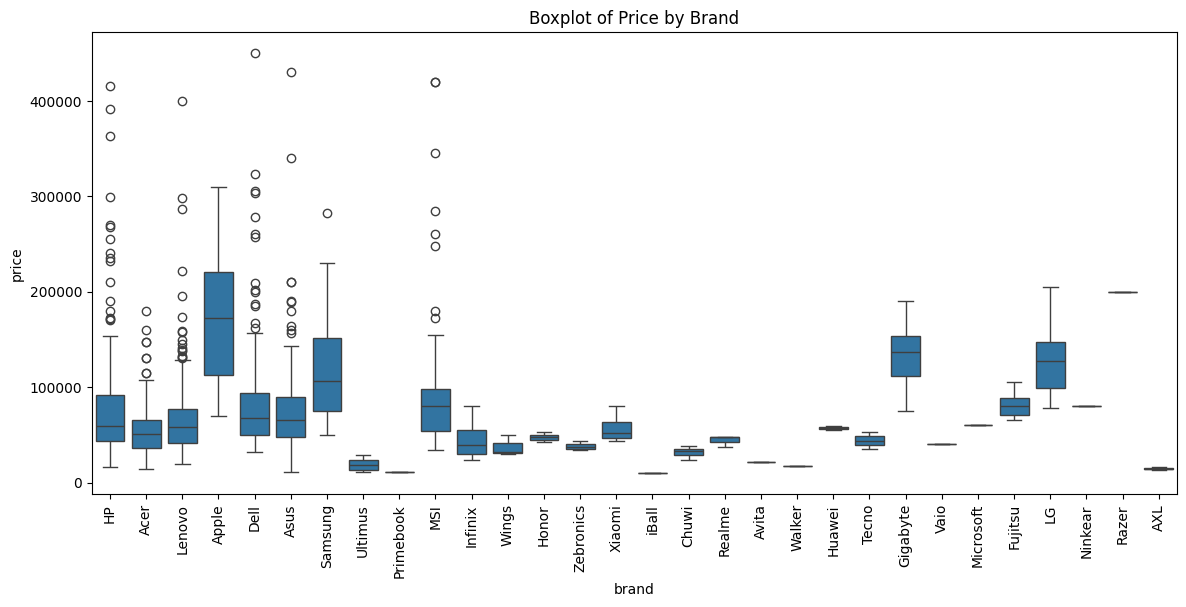

In [30]:
plt.figure(figsize=(14,6))
sns.boxplot(x='brand', y='price', data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Price by Brand")
plt.show()

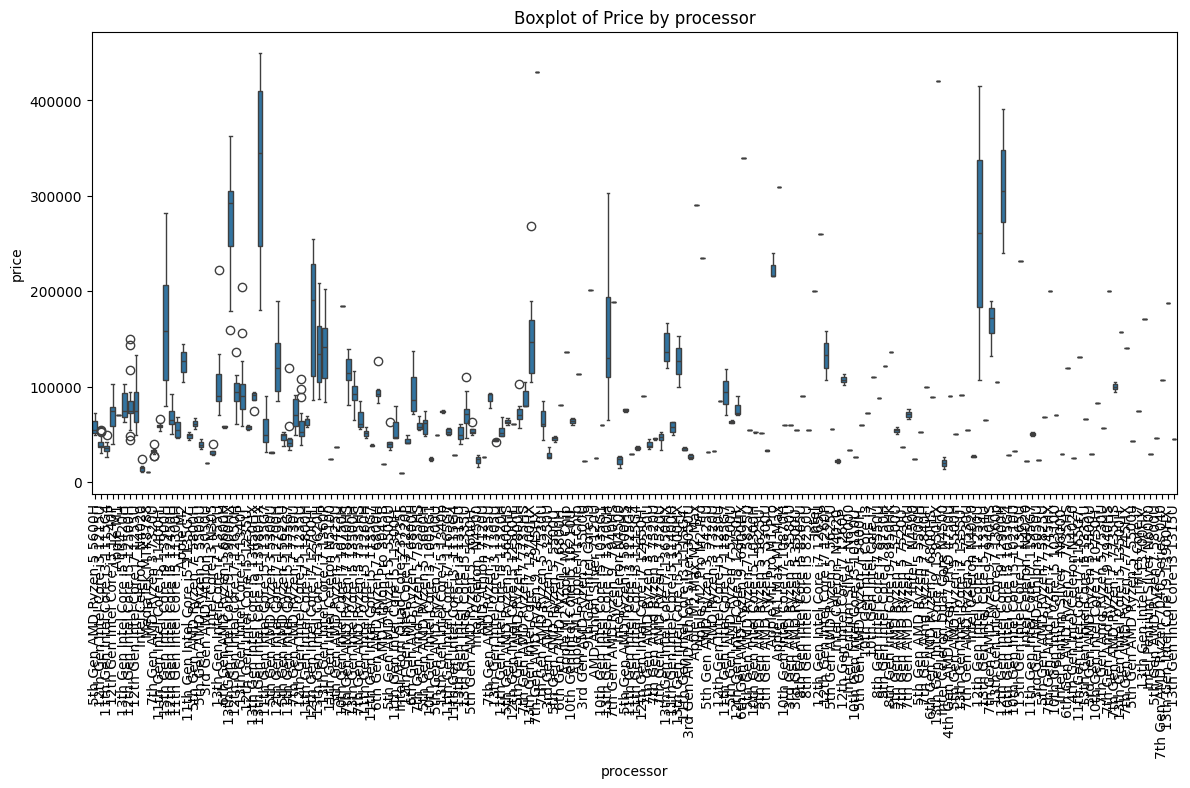

In [32]:
plt.figure(figsize=(14,6))
sns.boxplot(x='processor', y='price', data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Price by processor")
plt.show()

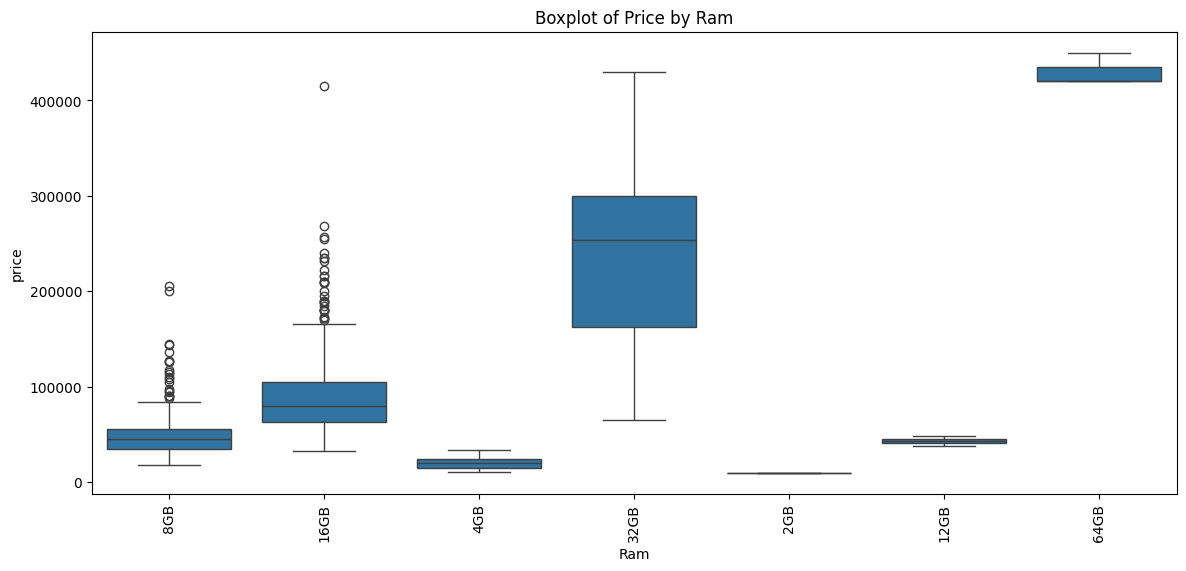

In [33]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Ram', y='price', data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Price by Ram")
plt.show()


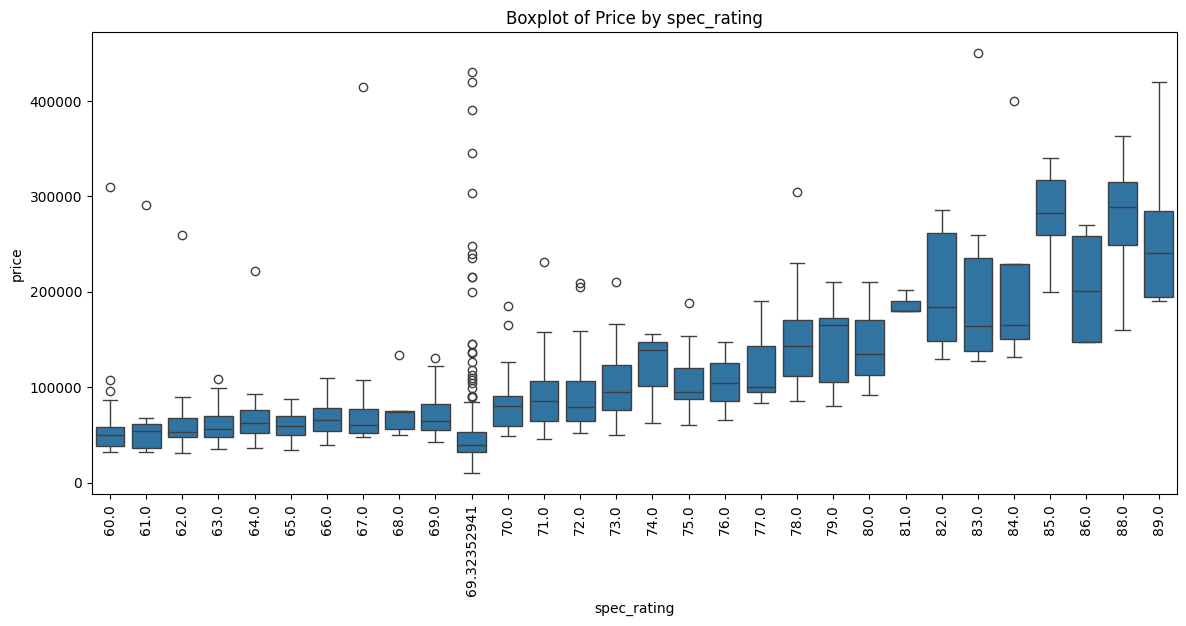

In [34]:
plt.figure(figsize=(14,6))
sns.boxplot(x='spec_rating', y='price', data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Price by spec_rating")
plt.show()


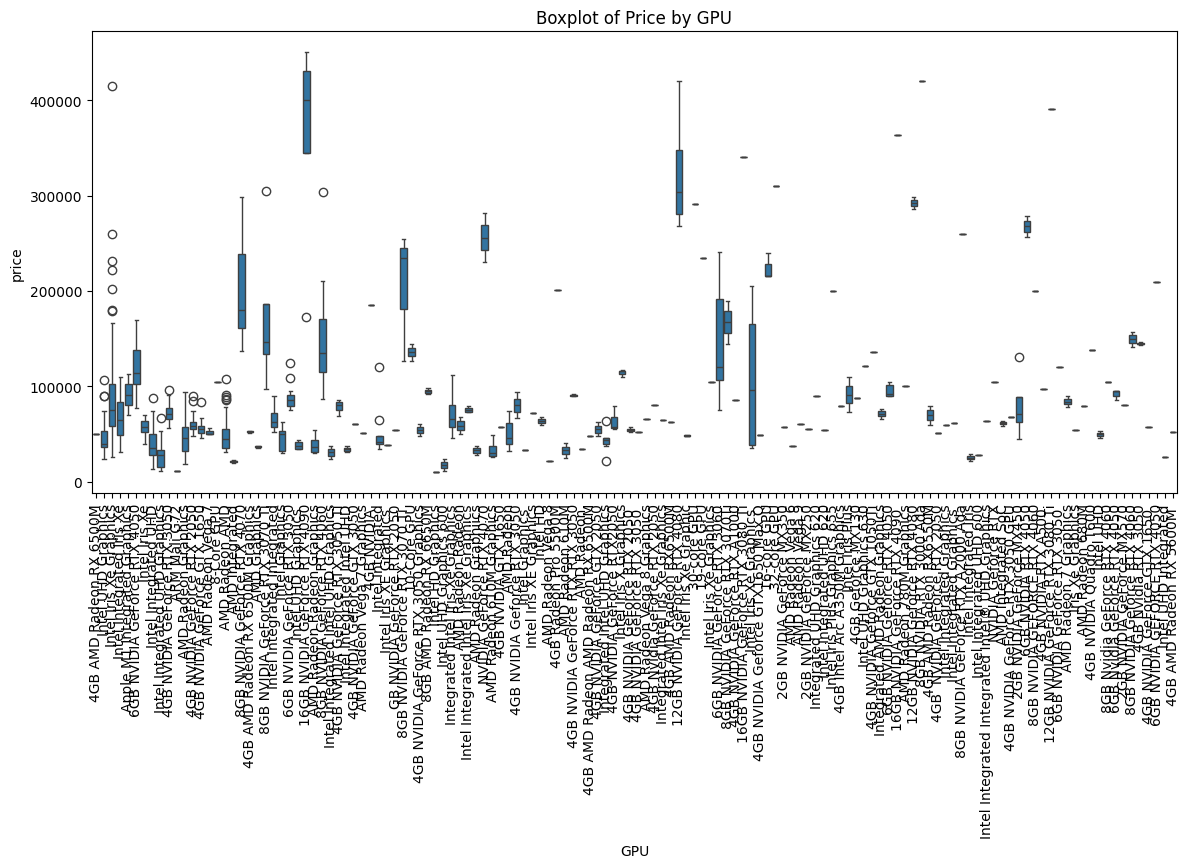

In [35]:
plt.figure(figsize=(14,6))
sns.boxplot(x='GPU', y='price', data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Price by GPU")
plt.show()

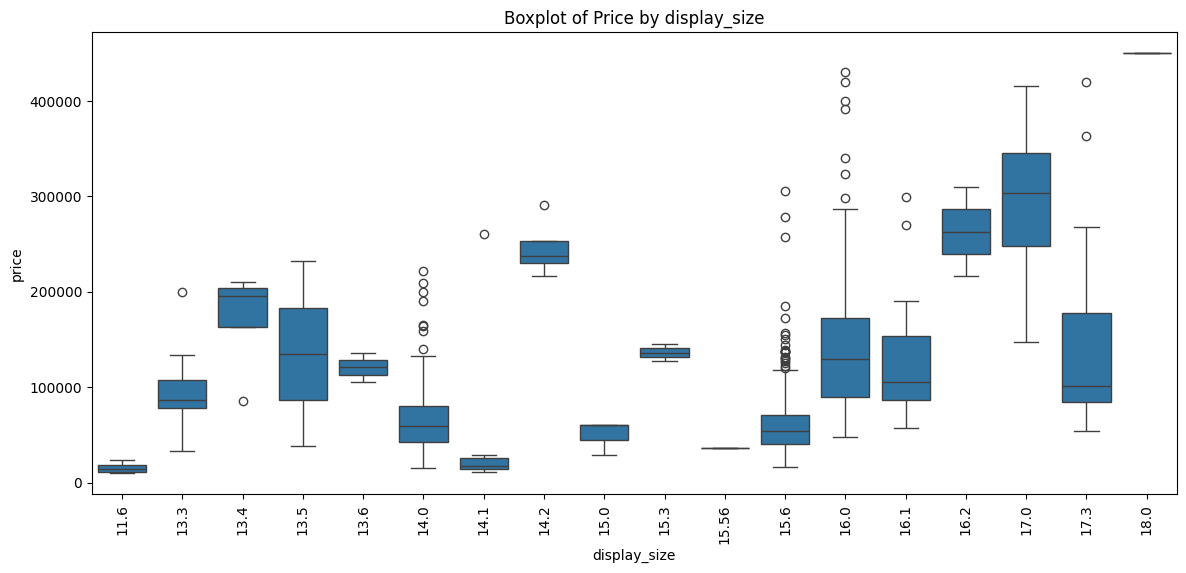

In [36]:
plt.figure(figsize=(14,6))
sns.boxplot(x='display_size', y='price', data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Price by display_size")
plt.show()


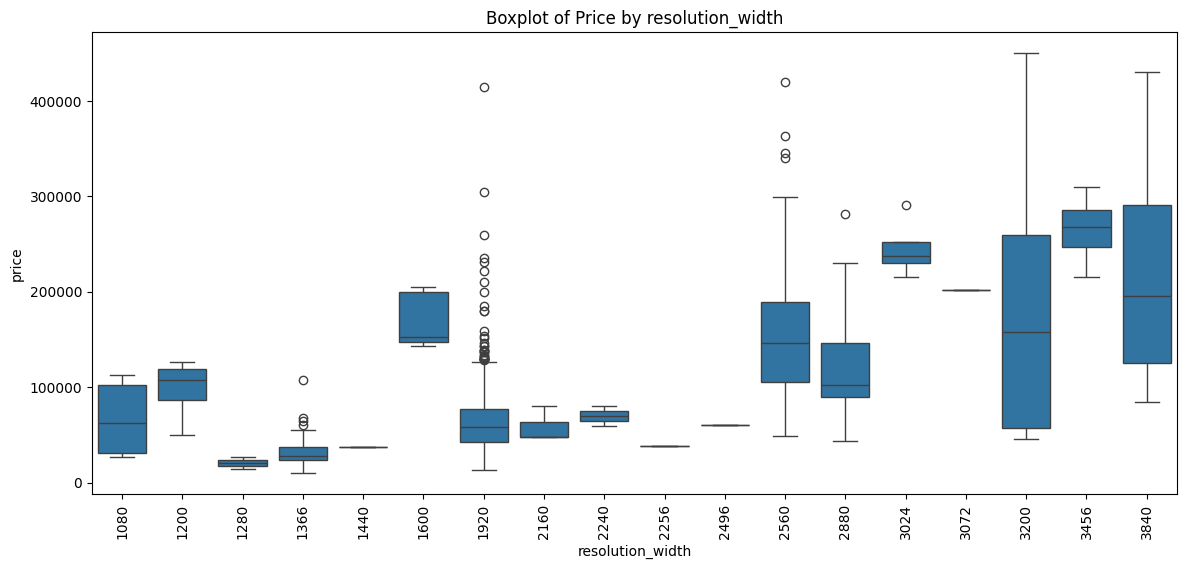

In [37]:
plt.figure(figsize=(14,6))
sns.boxplot(x='resolution_width', y='price', data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Price by resolution_width")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


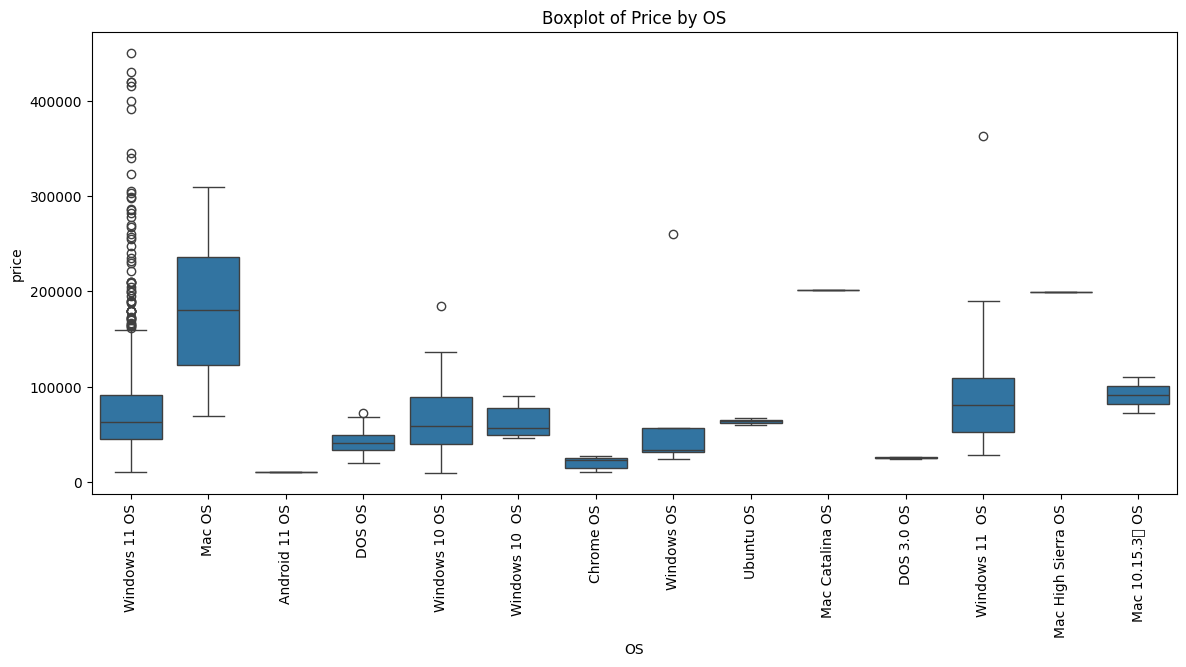

In [38]:
plt.figure(figsize=(14,6))
sns.boxplot(x='OS', y='price', data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Price by OS")
plt.show()


Regression Plot: Display Size vs Price


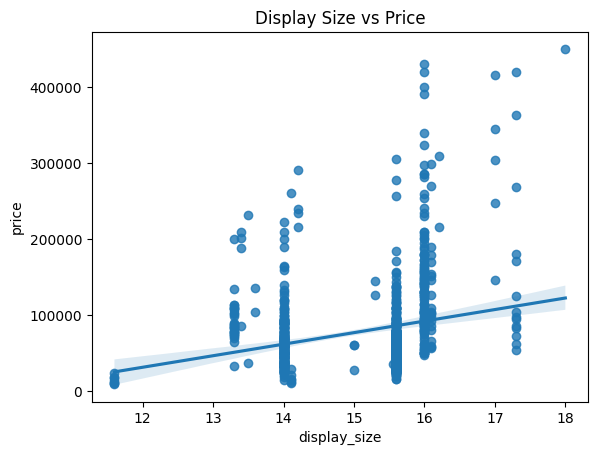

In [ ]:
sns.regplot(x='display_size', y='price', data=df)
plt.title("Display Size vs Price")
plt.show()


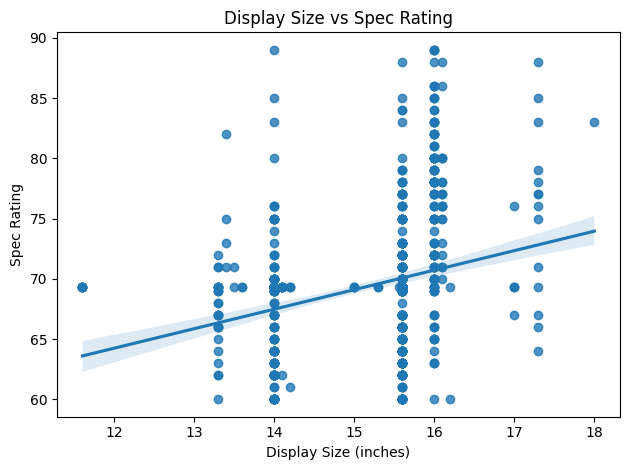

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/dataset.laptop.csv")

# Regression Plot: Display Size vs Spec Rating (proxy for price)
sns.regplot(x='display_size', y='spec_rating', data=df)
plt.title("Display Size vs Spec Rating")
plt.xlabel("Display Size (inches)")
plt.ylabel("Spec Rating")
plt.tight_layout()
plt.show()

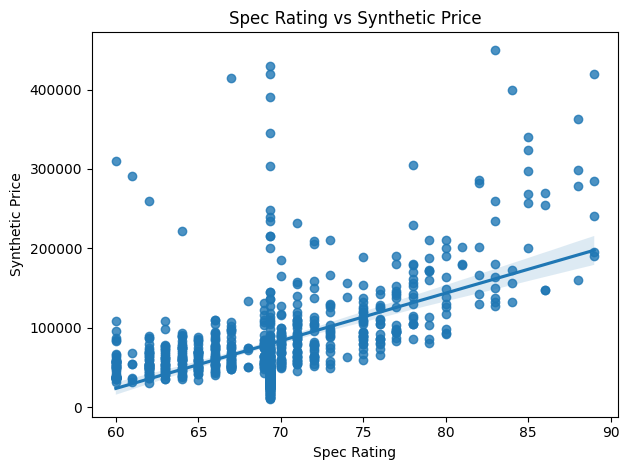

In [50]:
sns.regplot(x='spec_rating', y='price', data=df)
plt.title("Spec Rating vs Synthetic Price")
plt.xlabel("Spec Rating")
plt.ylabel("Synthetic Price")
plt.tight_layout()
plt.show()


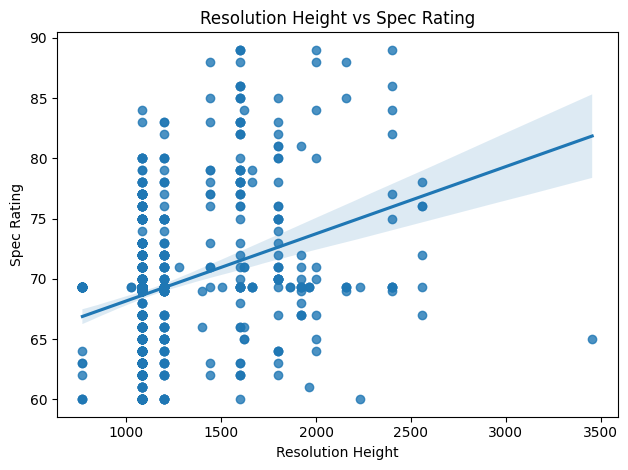

In [60]:
sns.regplot(x='resolution_height', y='spec_rating', data=df)
plt.title("Resolution Height vs Spec Rating")
plt.xlabel("Resolution Height")
plt.ylabel("Spec Rating")
plt.tight_layout()
plt.show()


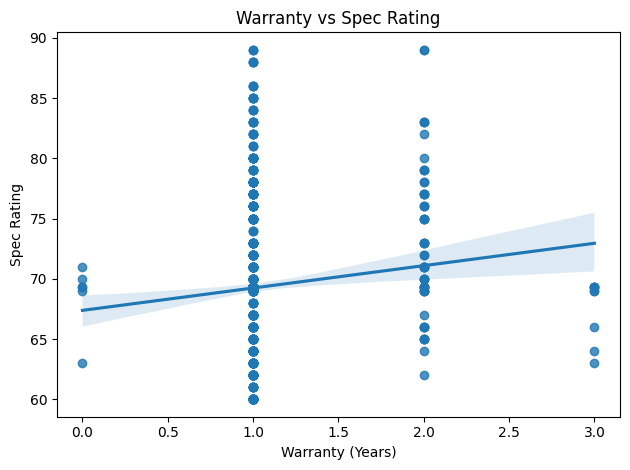

In [61]:
sns.regplot(x='warranty', y='spec_rating', data=df)
plt.title("Warranty vs Spec Rating")
plt.xlabel("Warranty (Years)")
plt.ylabel("Spec Rating")
plt.tight_layout()
plt.show()


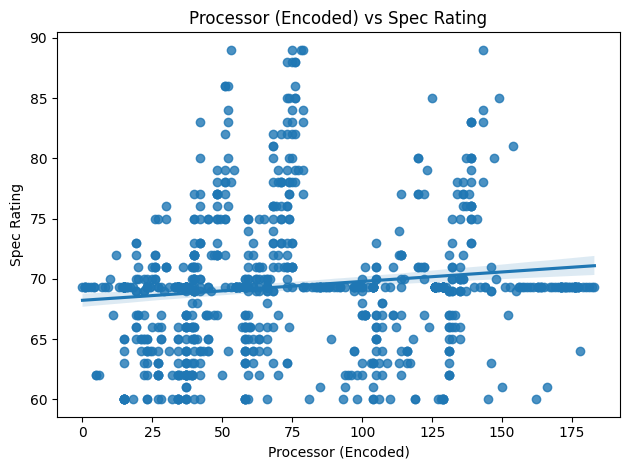

In [62]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['processor_encoded'] = le.fit_transform(df['processor'])

sns.regplot(x='processor_encoded', y='spec_rating', data=df)
plt.title("Processor (Encoded) vs Spec Rating")
plt.xlabel("Processor (Encoded)")
plt.ylabel("Spec Rating")
plt.tight_layout()
plt.show()


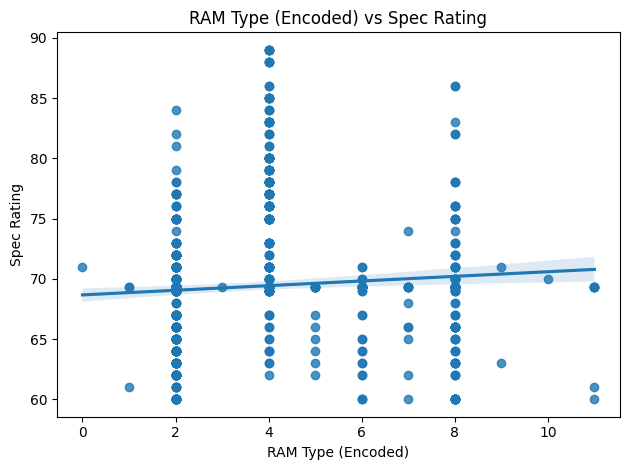

In [63]:
df['Ram_type_encoded'] = le.fit_transform(df['Ram_type'])

sns.regplot(x='Ram_type_encoded', y='spec_rating', data=df)
plt.title("RAM Type (Encoded) vs Spec Rating")
plt.xlabel("RAM Type (Encoded)")
plt.ylabel("Spec Rating")
plt.tight_layout()
plt.show()


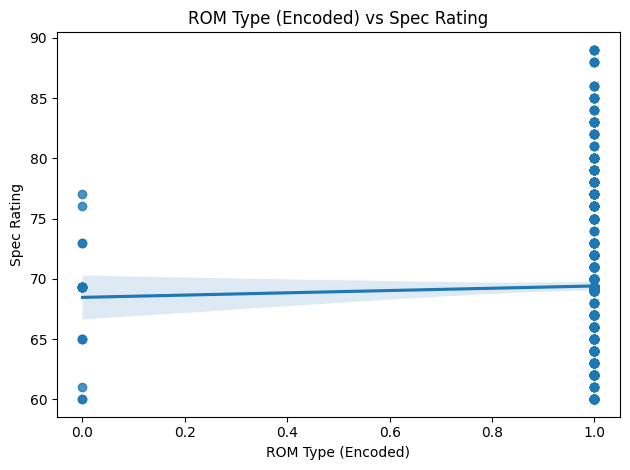

In [64]:
df['ROM_type_encoded'] = le.fit_transform(df['ROM_type'])

sns.regplot(x='ROM_type_encoded', y='spec_rating', data=df)
plt.title("ROM Type (Encoded) vs Spec Rating")
plt.xlabel("ROM Type (Encoded)")
plt.ylabel("Spec Rating")
plt.tight_layout()
plt.show()


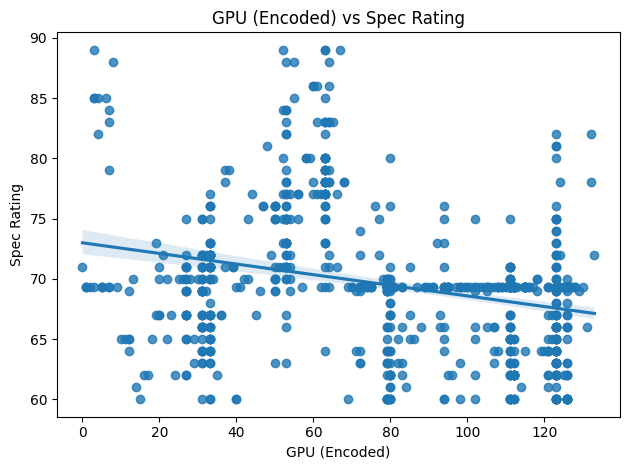

In [65]:
df['GPU_encoded'] = le.fit_transform(df['GPU'])

sns.regplot(x='GPU_encoded', y='spec_rating', data=df)
plt.title("GPU (Encoded) vs Spec Rating")
plt.xlabel("GPU (Encoded)")
plt.ylabel("Spec Rating")
plt.tight_layout()
plt.show()


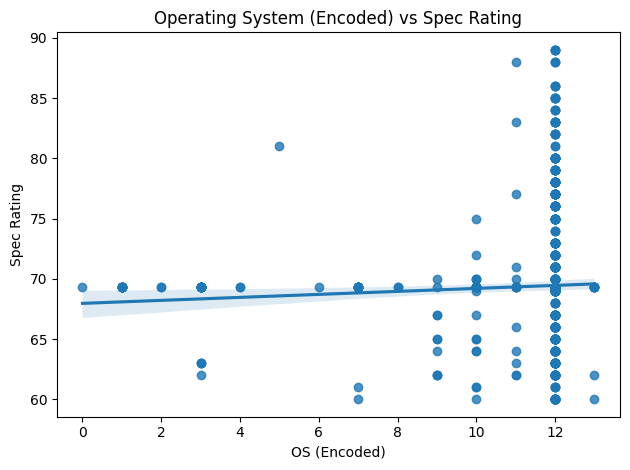

In [66]:
df['OS_encoded'] = le.fit_transform(df['OS'])

sns.regplot(x='OS_encoded', y='spec_rating', data=df)
plt.title("Operating System (Encoded) vs Spec Rating")
plt.xlabel("OS (Encoded)")
plt.ylabel("Spec Rating")
plt.tight_layout()
plt.show()


In [68]:
from scipy import stats
import pandas as pd

df = pd.read_csv("/content/dataset.laptop.csv")

pearson_coef, p_value = stats.pearsonr(df['display_size'], df['spec_rating'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)


The Pearson Correlation Coefficient is 0.274205723529468  with a P-value of P = 7.238784346713774e-17


In [72]:
from scipy import stats
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Reload the dataset
df = pd.read_csv("/content/dataset.laptop.csv")

# Reapply the data cleaning and transformation steps

# Convert RAM and ROM units
def convert_storage(val):
    val = str(val).upper().strip()
    if 'TB' in val:
        return int(float(val.replace('TB', '')) * 1000)
    elif 'GB' in val:
        return int(val.replace('GB', ''))
    else:
        return np.nan

df['Ram'] = df['Ram'].apply(convert_storage)
df['ROM'] = df['ROM'].apply(convert_storage)

# Drop Irrelevant Columns
df.drop(columns=['name', 'CPU'], inplace=True)

cat_cols = ['brand', 'processor', 'Ram_type', 'ROM_type', 'GPU', 'OS']
le = LabelEncoder() # Re-instantiate the encoder
for col in cat_cols:
    # Handle potential NaNs before encoding
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str)) # Convert to string to handle potential NaNs or mixed types during encoding

# Drop Missing Values - This is crucial before correlation if there are NaNs
df.dropna(inplace=True)

numeric_features = ['Ram', 'ROM', 'display_size', 'resolution_width', 'resolution_height', 'warranty']

for feature in numeric_features:
    # Ensure the columns exist after dropping some and before calculation
    if feature in df.columns and 'spec_rating' in df.columns:
        # Ensure both columns are indeed numeric after transformations/dropping NaNs
        if pd.api.types.is_numeric_dtype(df[feature]) and pd.api.types.is_numeric_dtype(df['spec_rating']):
            coef, p = stats.pearsonr(df[feature], df['spec_rating'])
            print(f"{feature} vs spec_rating: Pearson Correlation = {coef:.3f}, P-value = {p:.4g}")
        else:
             print(f"Skipping correlation for {feature} as one of the columns is not numeric after processing.")
    else:
        print(f"Skipping correlation for {feature} as column(s) not found in dataframe after processing.")

Ram vs spec_rating: Pearson Correlation = 0.403, P-value = 3.521e-36
ROM vs spec_rating: Pearson Correlation = 0.393, P-value = 2.21e-34
display_size vs spec_rating: Pearson Correlation = 0.274, P-value = 7.239e-17
resolution_width vs spec_rating: Pearson Correlation = 0.338, P-value = 2.985e-25
resolution_height vs spec_rating: Pearson Correlation = 0.329, P-value = 6.447e-24
warranty vs spec_rating: Pearson Correlation = 0.110, P-value = 0.001047


Pearson Correlation with P-values

In [ ]:
def calculate_pearson_pvals(data):
    numeric_df = data.select_dtypes(include=[np.number])
    pvals = pd.DataFrame(np.ones((numeric_df.shape[1], numeric_df.shape[1])), columns=numeric_df.columns, index=numeric_df.columns)
    for i in numeric_df.columns:
        for j in numeric_df.columns:
            if i != j:
                _, pval = stats.pearsonr(numeric_df[i], numeric_df[j])
                pvals.loc[i, j] = pval
    return pvals

print("Pearson p-values:\n", calculate_pearson_pvals(df))


Pearson p-values:
                           brand   spec_rating     processor            Ram  \
brand              1.000000e+00  7.021481e-01  4.678899e-04   2.004355e-01   
spec_rating        7.021481e-01  1.000000e+00  1.032941e-04   3.520619e-36   
processor          4.678899e-04  1.032941e-04  1.000000e+00   5.418700e-01   
Ram                2.004355e-01  3.520619e-36  5.418700e-01   1.000000e+00   
Ram_type           2.063452e-01  1.374843e-02  7.026243e-09   2.042813e-10   
ROM                3.314451e-01  2.209989e-34  1.665968e-01   3.019402e-90   
ROM_type           6.867898e-01  4.397623e-01  9.439929e-01   1.224502e-04   
GPU                1.128505e-04  1.036532e-18  3.393535e-14   4.347769e-17   
display_size       8.364607e-01  7.238784e-17  1.455180e-02   1.473266e-08   
resolution_width   2.670347e-01  2.984930e-25  1.770293e-01   7.863658e-50   
resolution_height  1.819946e-02  6.447427e-24  3.182558e-01   8.085456e-41   
OS                 7.536653e-01  1.844902e-01

(v) Evaluation


Compare Models: RMSE & R² Score

In [ ]:
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
lr_r2 = r2_score(y_test, lr_preds)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_r2 = r2_score(y_test, rf_preds)

print(f"Linear Regression - RMSE: {lr_rmse:.4f}, R2: {lr_r2:.4f}")
print(f"Random Forest      - RMSE: {rf_rmse:.4f}, R2: {rf_r2:.4f}")


Linear Regression - RMSE: 0.0657, R2: 0.7564
Random Forest      - RMSE: 0.0485, R2: 0.8669
